In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 加载数据并提取相关属性
data = np.load('500_2020.npy')

# 提取各个维度的数据
open_prices = data[:, 0]
close_prices = data[:, 1]
high_prices = data[:, 2]
low_prices = data[:, 3]
volume = data[:, 4]
fopen_prices = data[:, 5]
fclose_prices = data[:, 6]
fhigh_prices = data[:, 7]
flow_prices = data[:, 8]
fvolume = data[:, 9]
trend = data[:, 10]  # 趋势标签

In [4]:
# 2. 统计分析
# 计算均值、中位数、标准差
statistics = {
    'Metric': ['开盘价', '收盘价', '最高价', '最低价', '交易量'],
    'Mean': [np.mean(open_prices), np.mean(close_prices), np.mean(high_prices), np.mean(low_prices), np.mean(volume)],
    'Median': [np.median(open_prices), np.median(close_prices), np.median(high_prices), np.median(low_prices), np.median(volume)],
    'Std': [np.std(open_prices), np.std(close_prices), np.std(high_prices), np.std(low_prices), np.std(volume)]
}

statistics_df = pd.DataFrame(statistics)
print(statistics_df)

  Metric           Mean        Median            Std
0    开盘价    5923.554158    5861.60925     536.037457
1    收盘价    5923.598225    5861.67095     536.028322
2    最高价    5925.170704    5862.94040     536.195277
3    最低价    5921.926863    5860.16795     535.870363
4    交易量  606487.726627  464245.50000  521443.805438


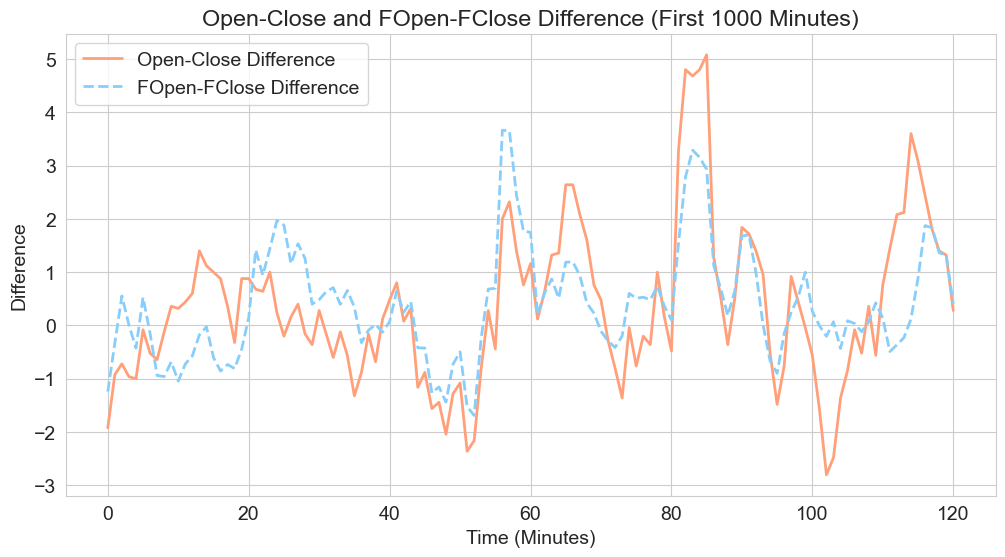

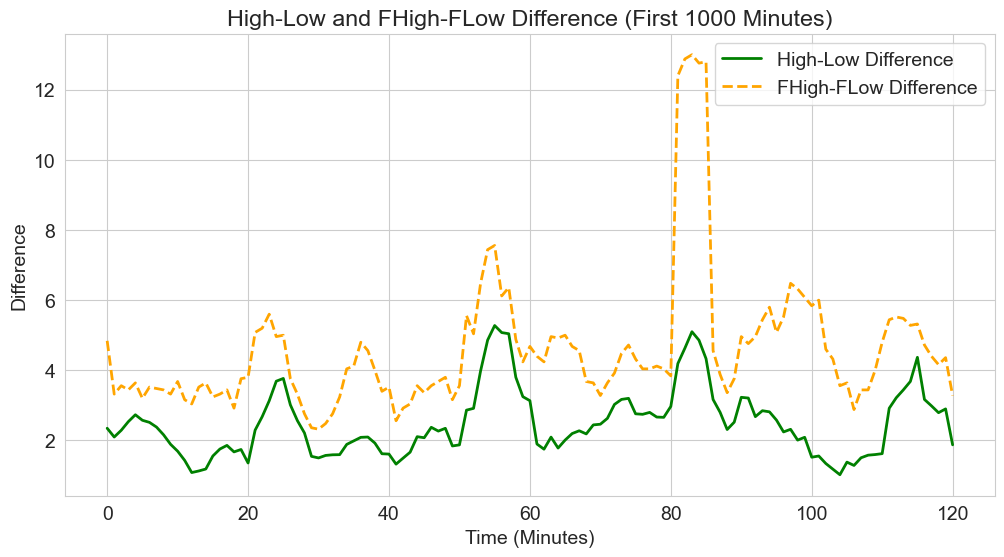

In [7]:
plt.rcParams.update({'font.size': 14})

# 3.1 开盘价和收盘价的差值趋势 (OPEN-CLOSE 和 FOPEN-FCLOSE)
open_close_diff = open_prices - close_prices
fopen_fclose_diff = fopen_prices - fclose_prices

colors = {
    'open_close_diff': '#FFA07A',  # 淡橙色
    'fopen_fclose_diff': '#87CEFA',  # 淡蓝色
    'high_low_diff': '#98FB98',  # 淡绿色
    'fhigh_flow_diff': '#FFD700'  # 金黄色
}

# 采样和平滑参数
sampling_interval = 8  # 每10个点进行一次采样
window_size = 5  # 移动平均窗口大小

def smooth(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# 对Open-Close和High-Low进行采样和平滑处理
sampled_open_close_diff = (open_prices[:1000] - close_prices[:1000])[::sampling_interval]
smoothed_open_close_diff = smooth(sampled_open_close_diff, window_size)

sampled_fopen_fclose_diff = (fopen_prices[:1000] - fclose_prices[:1000])[::sampling_interval]
smoothed_fopen_fclose_diff = smooth(sampled_fopen_fclose_diff, window_size)

sampled_high_low_diff = (high_prices[:1000] - low_prices[:1000])[::sampling_interval]
smoothed_high_low_diff = smooth(sampled_high_low_diff, window_size)

sampled_fhigh_flow_diff = (fhigh_prices[:1000] - flow_prices[:1000])[::sampling_interval]
smoothed_fhigh_flow_diff = smooth(sampled_fhigh_flow_diff, window_size)


plt.figure(figsize=(12, 6))
plt.plot(smoothed_fopen_fclose_diff[:1000], label='Open-Close Difference', color=colors["open_close_diff"], linewidth=2)
plt.plot(smoothed_open_close_diff[:1000], label='FOpen-FClose Difference', color=colors["fopen_fclose_diff"], linestyle='--', linewidth=2)
plt.title('Open-Close and FOpen-FClose Difference (First 1000 Minutes)')
plt.xlabel('Time (Minutes)')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()

# 3.2 最高价和最低价的差值趋势 (HIGH-LOW 和 FHIGH-FLOW)
# high_low_diff = high_prices - low_prices
# fhigh_flow_diff = fhigh_prices - flow_prices

plt.figure(figsize=(12, 6))
plt.plot(smoothed_high_low_diff[:1000], label='High-Low Difference', color='green', linewidth=2)
plt.plot(smoothed_fhigh_flow_diff[:1000], label='FHigh-FLow Difference', color='orange', linestyle='--', linewidth=2)
plt.title('High-Low and FHigh-FLow Difference (First 1000 Minutes)')
plt.xlabel('Time (Minutes)')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()

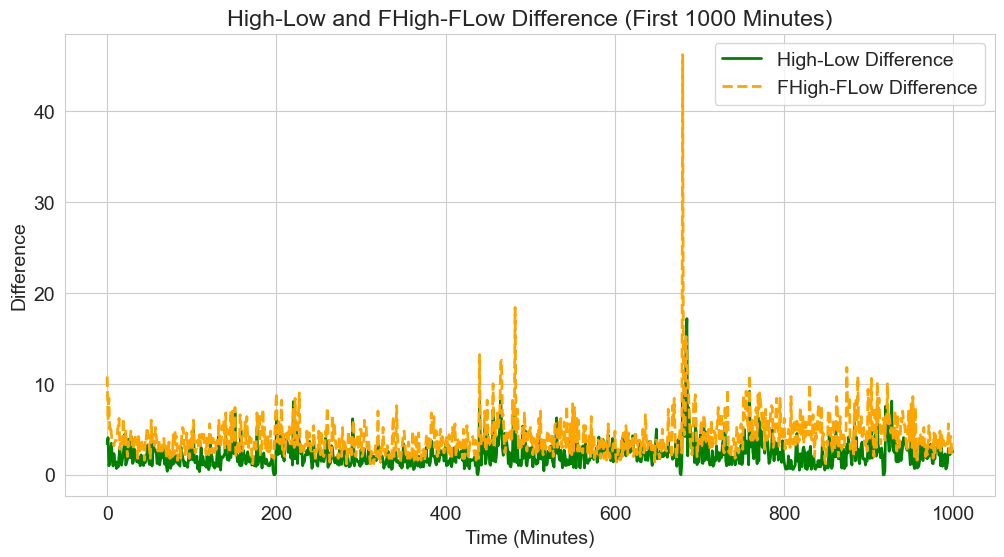

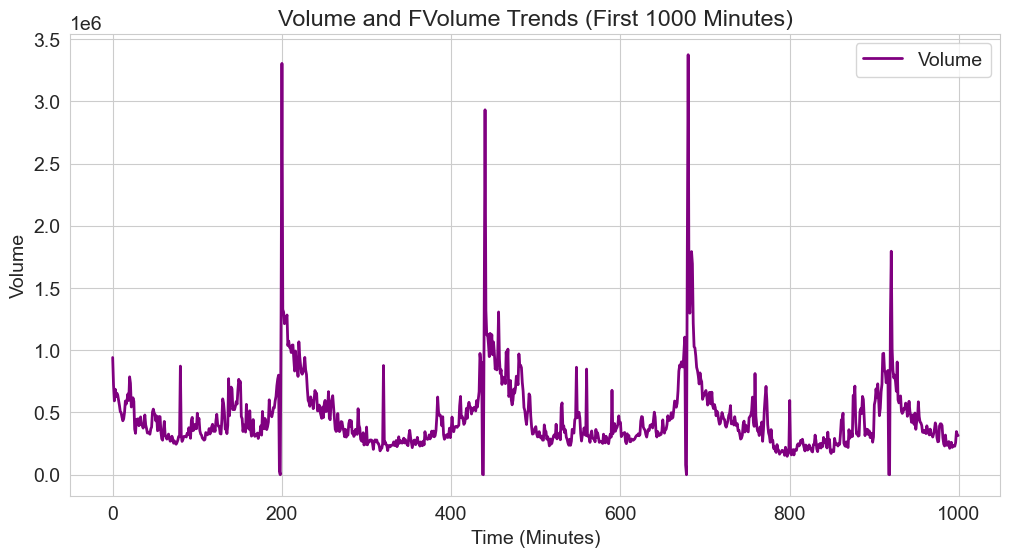

In [10]:
high_low_diff = high_prices - low_prices
fhigh_flow_diff = fhigh_prices - flow_prices

plt.figure(figsize=(12, 6))
plt.plot(high_low_diff[:1000], label='High-Low Difference', color='green', linewidth=2)
plt.plot(fhigh_flow_diff[:1000], label='FHigh-FLow Difference', color='orange', linestyle='--', linewidth=2)
plt.title('High-Low and FHigh-FLow Difference (First 1000 Minutes)')
plt.xlabel('Time (Minutes)')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()

# 3.3 交易量的变化趋势 (VOL 和 FVOL)
plt.figure(figsize=(12, 6))
plt.plot(volume[:1000], label='Volume', color='purple', linewidth=2)
# plt.plot(fvolume[:1000], label='FVolume', color='brown', linestyle='--', linewidth=2)
plt.title('Volume and FVolume Trends (First 1000 Minutes)')
plt.xlabel('Time (Minutes)')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

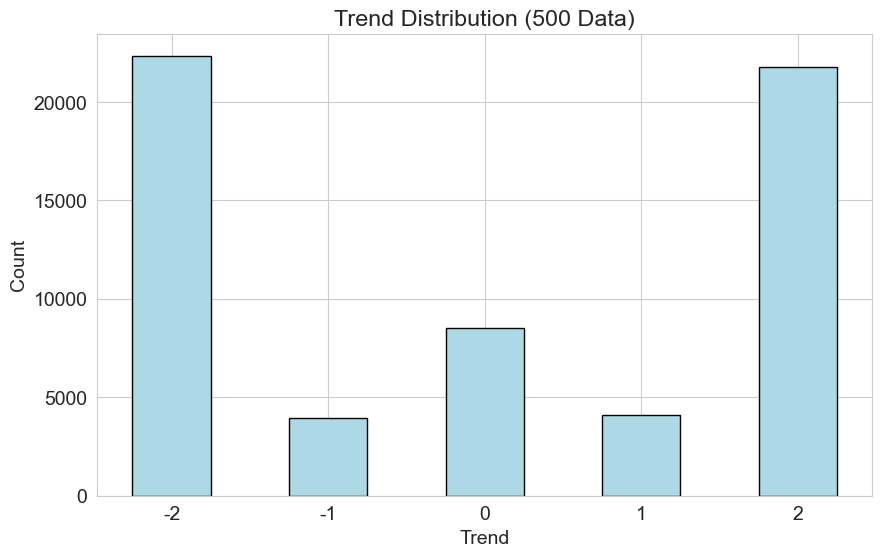

In [13]:
trend_counts_500 = [np.sum(trend == -2), np.sum(trend == -1), np.sum(trend == 0), np.sum(trend == 1), np.sum(trend == 2)]

plt.figure(figsize=(10, 6))
plt.bar([-2, -1, 0, 1, 2], trend_counts_500, tick_label=['-2', '-1', '0', '1', '2'], edgecolor='black',color='lightblue', width=0.5)
plt.title('Trend Distribution (500 Data)')
plt.xlabel('Trend')
plt.ylabel('Count')
plt.grid(True)
plt.show()

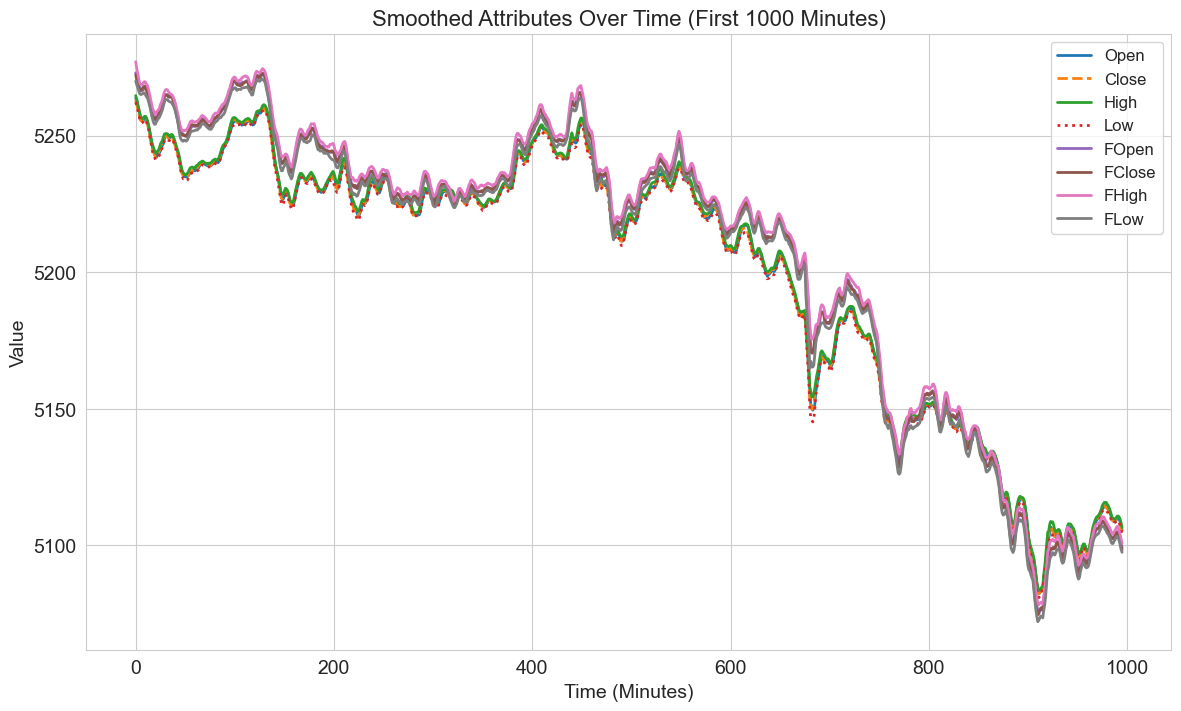

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 加载数据并提取相关属性
data = np.load('500_2020.npy')

# 提取各个维度的数据
open_prices = data[:, 0]
close_prices = data[:, 1]
high_prices = data[:, 2]
low_prices = data[:, 3]
fopen_prices = data[:, 5]
fclose_prices = data[:, 6]
fhigh_prices = data[:, 7]
flow_prices = data[:, 8]

# 平滑函数，使用移动平均
def smooth(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

window_size = 5

smoothed_open = smooth(open_prices[:1000], window_size)
smoothed_close = smooth(close_prices[:1000], window_size)
smoothed_high = smooth(high_prices[:1000], window_size)
smoothed_low = smooth(low_prices[:1000], window_size)
smoothed_fopen = smooth(fopen_prices[:1000], window_size)
smoothed_fclose = smooth(fclose_prices[:1000], window_size)
smoothed_fhigh = smooth(fhigh_prices[:1000], window_size)
smoothed_flow = smooth(flow_prices[:1000], window_size)

# 明亮且柔和的颜色方案
colors = {
    'open': '#FFA07A',  # 淡橙色
    'close': '#87CEFA',  # 淡蓝色
    'high': '#98FB98',  # 淡绿色
    'low': '#FFD700',  # 金黄色
    'fopen': '#FFB6C1',  # 淡粉色
    'fclose': '#8A2BE2',  # 紫罗兰色
    'fhigh': '#4682B4',  # 钢蓝色
    'flow': '#FFA500'  # 橙色
}

# 3.5 平滑后的趋势随时间的变化
plt.figure(figsize=(14, 8))

# 绘制平滑后的曲线
plt.plot(smoothed_open, label='Open',  linewidth=2)
plt.plot(smoothed_close, label='Close', linestyle='--', linewidth=2)
plt.plot(smoothed_high, label='High', linewidth=2)
plt.plot(smoothed_low, label='Low', linestyle=':', linewidth=2)

plt.plot(smoothed_fopen, label='FOpen', linewidth=2)
plt.plot(smoothed_fclose, label='FClose',linewidth=2)
plt.plot(smoothed_fhigh, label='FHigh', linewidth=2)
plt.plot(smoothed_flow, label='FLow', linewidth=2)

# 添加标题和标签
plt.title('Smoothed Attributes Over Time (First 1000 Minutes)', fontsize=16)
plt.xlabel('Time (Minutes)', fontsize=14)
plt.ylabel('Value', fontsize=14)

# 添加图例
plt.legend(fontsize=12)

# 添加网格
plt.grid(True)

# 显示图表
plt.show()